In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

## decision function help you find the distance of the different side of hyperplane 

## support vectors is array like [n_sv,n_features]

In [76]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
        if ax is None:
            ax=plt.gca()
        xlim=ax.get_xlim()
        ylim=ax.get_ylim()
        x=np.linspace(xlim[0],xlim[1],30)
        y=np.linspace(ylim[0],ylim[1],30)
        x,y=np.meshgrid(x,y)
        xy=np.vstack([x.ravel(),y.ravel()]).T
        p=model.decision_function(xy).reshape(x.shape)
        ax.contour(x,y,p,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
        if plot_support:
            ax.scatter(model.support_vectors_[:,0],
                          model.support_vectors_[:,1],
                          s=300,linewidth=1,facecolors='blue')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

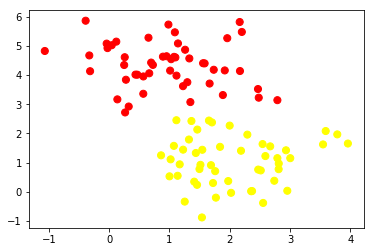

In [77]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

## The Bigger blue points are the support vectors that help to find the best margin 

##  A smaller C would lead to bigger margin, but more violations

Text(0.5,1,'C=0.1')

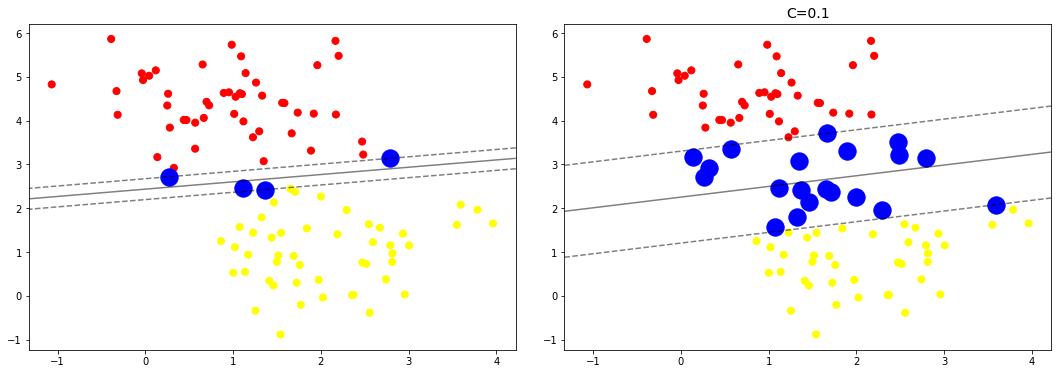

In [78]:
fig, ax=plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi, C in zip (ax,[10.0,0.1]):
    model=SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
axi.set_title('C=%.1f'% C,size=14)